# Optimizing a chemical reaction

As a very simple example of optimizing a chemical reaction, we try to find the
mix of universal indicator and acid that gives the best green color. While this
is a very simple experiment, it shows the general approach one would follow in
optimizing a chemical reaction according to yield or purity.

We have made a full factorial mix of different levels of indicator and acid,
and measured the reuslting color:

![Full factorial indicator and acid mix in a plate](../ProcessOptimizer/model_systems/data/color_pH_image.jpg)

We can use this to simulate doing one experiment at a time. This behavior is
captured by the model system color_pH.

We first set up the parameter space, the optimizer, and import the model
system.

In [1]:
import ProcessOptimizer as po

search_space = [po.Integer(35,80, name="percentacid"),
       po.Integer(5,40, name="indicator")]

opt = po.Optimizer(search_space, n_initial_points=4)

model_system = po.model_systems.color_pH

We can now ask the optimizer to suggest the next experiment to run, and use the
model system to tell simulate running the experiment and telling us how good
that experiment is.

In [2]:
# Get the first suggested experiment
next_experiment = opt.ask()
print(("Next suggested experiment has "
      + str(next_experiment[0])
      + " percent acid and "
      + str(next_experiment[1])
      + " μL indicator."))

# Run the experiment and get the result
quality = model_system.get_score(next_experiment)

experiment_list = [(next_experiment, quality)]

print("The experiment had a quality of " + str(quality))

Next suggested experiment has 75 percent acid and 36 μL indicator.
The experiment had a quality of 50.46574828773892


Now, we can tell the optimizer about the experiment we just "performed".

In [3]:
result = opt.tell(next_experiment, quality)

We can keep doing this for a few runs.

In [4]:
for i in range(7):
    next_experiment = opt.ask()
    quality = model_system.get_score(next_experiment)
    experiment_list.append((next_experiment, quality))
    result = opt.tell(next_experiment, quality)

Finally, we can plot the result object in different ways to inspect the model.

array([[<Axes: xlabel='percentacid', ylabel='Dependence'>, <Axes: >],
       [<Axes: xlabel='percentacid', ylabel='indicator'>,
        <Axes: xlabel='indicator', ylabel='Dependence'>]], dtype=object)

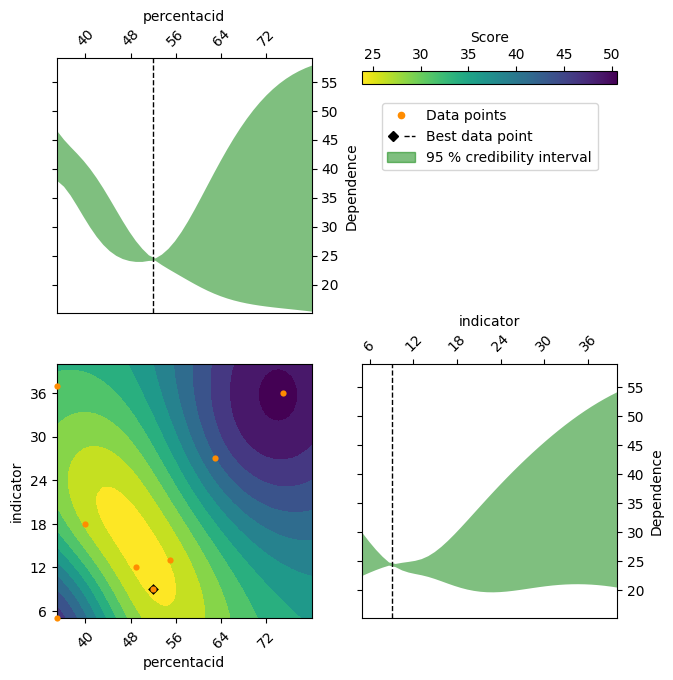

In [5]:
po.plot_objective(result,pars="expected_minimum")